In [ ]:
import random
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X = x_train[:2000]
y = y_train[:2000]

In [ ]:
#X = X.reshape(2000, 784)
X = (X - X.min()) / (X.max()-X.min())

In [ ]:
inputs = keras.Input((784,))
x = keras.layers.Dense(
    units=512,
    activation='sigmoid'
)(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(
    units=128,
    activation='sigmoid'
)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(
    units=64,
    activation='sigmoid'
)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(units=24,
    activation='sigmoid')(x)
outputs = keras.layers.BatchNormalization()(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
import keras.layers as layers
input_shape = (28, 28, 1)
num_classes = 2
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="sigmoid"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="sigmoid"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

In [ ]:
def m_loss(a, b):
  return -keras.losses.MSE(a, b)

model.compile(loss=m_loss)

In [ ]:
for _ in range(20):
   X_ = X + np.random.normal(loc=0., scale=0.000001, size=(2000, 28, 28))
   Y_ = model(X_)
   model.fit(X, Y_, batch_size=500,verbose=0)

In [ ]:
Y = model.predict(X)

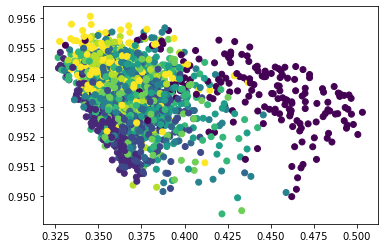

In [ ]:
plt.scatter(Y[:,0], Y[:,1], c=y)
plt.show()